# The Array-Backed List

## Agenda

1. The List **Abstract Data Type** (ADT)
2. A List **Data Structure**
3. The List API
4. Getting started
5. NumPy arrays
6. The `ArrayList` data structure
7. Runtime analysis

## 1. The List **Abstract Data Type** (ADT)

An **abstract data type (ADT)** defines a *conceptual model* for how data may be stored and accessed.

A **list ADT** is a data container where:

- values are ordered in a *sequence*
- each value has at most one preceding and one succeeding value
- a given value may appear more than once in a list

Other common ADTs (some of which we'll explore later) include:

- Stacks
- Queues
- Priority Queues
- Maps
- Graphs

## 2. A List **Data Structure**

A **list data structure** is a *concrete implementation* of the list ADT in some programming language, which, in addition to adhering to the basic premises of the ADT, will also typically support operations that:

- access values in the list by their position (index)
- append and insert new values into the list
- remove values from the list

The implementation of any data structure will generally rely on simpler, constituent data types (e.g., "primitive" types offered by the language), the choice of which may affect the runtime complexities of said operations.

## 3. The List API

The operations we'll be building into our list data structures will be based on the [common](https://docs.python.org/3.6/library/stdtypes.html#common-sequence-operations) and [mutable](https://docs.python.org/3.6/library/stdtypes.html#mutable-sequence-types) sequence operations defined by the Python library.

In [ ]:
class List:        
    ### subscript-based access ###
    
    def __getitem__(self, idx):
        """Implements `x = self[idx]`"""
        pass

    def __setitem__(self, idx, value):
        """Implements `self[idx] = x`"""
        pass

    def __delitem__(self, idx):
        """Implements `del self[idx]`"""
        pass
    
    ### stringification ###
            
    def __repr__(self):
        """Supports inspection"""
        return '[]'
    
    def __str__(self):
        """Implements `str(self)`"""
        return '[]'

    ### single-element manipulation ###
    
    def append(self, value):
        pass
    
    def insert(self, idx, value):
        pass
    
    def pop(self, idx=-1):
        pass
    
    def remove(self, value):
        pass
    
    ### predicates (T/F queries) ###
    
    def __eq__(self, other):
        """Implements `self == other`"""
        return True

    def __contains__(self, value):
        """Implements `val in self`"""
        return True
    
    ### queries ###
    
    def __len__(self):
        """Implements `len(self)`"""
        return len(self.data)
    
    def min(self):
        pass
    
    def max(self):
        pass
    
    def index(self, value, i, j):
        pass
    
    def count(self, value):
        pass

    ### bulk operations ###

    def __add__(self, other):
        """Implements `self + other_array_list`"""
        return self
    
    def clear(self):
        pass
    
    def copy(self):
        pass

    def extend(self, other):
        pass

    ### iteration ###
    
    def __iter__(self):
        """Supports iteration (via `iter(self)`)"""
        pass

## 4. Getting started

In [18]:
class List:
    def append(self, value):
        self.val = value
    
    def __getitem__(self, idx):
        """Implements `x = self[idx]`"""
        return self.val

    def __setitem__(self, idx, value):
        """Implements `self[idx] = x`"""
        self.val = value
    
    def __repr__(self):
        """Supports inspection"""
        return f"[{repr(self.val)}]"

In [21]:
l = List()
l.append(42)

In [22]:
l # equivalent to l.__repr__()

[42]

In [23]:
l[0] # equivalent to l.__getitem__(0)

42

In [24]:
l[0] = 331 # equivalent to l.__setitem__(0, 331)

In [25]:
l[500]

331

In [26]:
l

[331]

Of course, we need our list implementation to hold more than a single element. The obvious solution for this is to use an *array*.

## 5. NumPy arrays

Python does not come with a built-in array type. Instead, we're going to make use of the array implementation provided by the [NumPy scientific computing package](https://numpy.org/doc/stable/user/absolute_beginners.html).

To create a NumPy array of size N, we can do:

In [31]:
import numpy as np

N = 10
arr = np.empty(N, dtype=object)
arr

array([None, None, None, None, None, None, None, None, None, None],
      dtype=object)

The `dtype=object` specification indicates that we want to use the array to store references to arbitrary Python objects. The `empty` function creates an array of the specified size, but leaves all elements uninitialized.

In [41]:
for i in range(5):
    arr[i] = i

arr[0]  = 'hello'
arr[4] = 'world'
arr[10] = "this isn't here"
arr

IndexError: index 10 is out of bounds for axis 0 with size 10

In [34]:
len(arr)

10

Recall that arrays are **fixed-size**, so we cannot append, insert, or delete elements to/from them directly. These operations must be implemented by the data structure we build *on top of* the array.

I.e., *an array is not a data structure*! It is a low-level *data storage* mechanism.

## 6. The `ArrayList` data structure

Our list data structure will make use of a NumPy array as its backing data store. This array will have a fixed initial size, but as elements are added to the list it may become necessary to create a new, larger backing array and copy our elements over. Each time we create a new backing array, we will *double the capacity of the original* -- this may seem arbitrary now, but we will see why it is a critical detail later on!

In [146]:
import numpy as np

class ArrayList:
    def __init__(self, size:int = 0):
        self._data = np.empty(1, dtype=object)
        self._size = size # number of elements in the list


    def append(self, value):
        # make sure there's enough space
        new_size = self._size + 1
        self._maybe_grow(new_size)
        # then add the element
        self._data[self._size] = value
        # and assign the new size
        self._size = new_size
        
    
    def _maybe_grow(self, requested_size):
        data_len = len(self._data)
        # first check if there's space
        if (requested_size > data_len):
            # if not, grow the data storage
            # by first creating a new array of double the length
            new_list = np.empty(data_len * 2, dtype=object)
            # then iterate over the old data & assign els to new array
            for idx in range(data_len):
                new_list[idx] = self._data[idx]
                
            # finally free the current data mem & iterator mem
            self._data = None
            iterator = None
            del iterator
            
            # then assign new list as current data store
            self._data = new_list
            
            
    def _normalize_validate_idx(self, idx) -> int:
        assert isinstance(idx, int), 'Index must be an integer'
        # protect against indices greater than size
        if (idx > self._size - 1):
            raise IndexError("index out of range")
        # normalize negative indexes as max index - value
        if (idx < 0):
            # negatives count backward from size,
            # so add size to negative index (same as size - abs(idx)))
            idx += self._size
            # now if idx is still negative, it's out of range
            if idx < 0: raise IndexError("index out of range")
        
        # return normalized & validated index
        return idx


    def __getitem__(self, idx):
        """Implements `x = self[idx]`"""
        nidx = self._normalize_validate_idx(idx)
        return self._data[nidx]
    

    def __setitem__(self, idx, value):
        """Implements `self[idx] = x`"""
        nidx = self._normalize_validate_idx(idx)
        self._data[nidx] = value
        

    def __delitem__(self, idx):
        """Implements `del self[idx]`"""
        nidx = self._normalize_validate_idx(idx)
        # loop over elements from requested delete idx to end
        for i in range(nidx, self._size - 1):
            # and copy the one after the current item to the current item's place
            self._data[i] = self._data[i+1]
        # finally, decrement size to account for deletion
        self._size -= 1
        
    
    def __len__(self):
        """Implements `len(self)`"""
        return self._size # note: not the same as `len(self.data)`!
    
    
    def __repr__(self):
        """Supports inspection"""
        repr_elems = [repr(self._data[i]) for i in range(self._size)]
        return '[' + ', '.join(repr_elems) + ']'

In [140]:
l = ArrayList()
for x in range(10):
    l.append(x)
print(l[0])
print(l[9])
print(l[-1])
l

0
9
9


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [141]:
l[0] = 'hello'
l[-1] = 'world'
l

['hello', 1, 2, 3, 4, 5, 6, 7, 8, 'world']

In [142]:
l[2] = 'two'
l[-3] = 'seven'
l

['hello', 1, 'two', 3, 4, 5, 6, 'seven', 8, 'world']

In [143]:
del l[5]
l

['hello', 1, 'two', 3, 4, 6, 'seven', 8, 'world']

In [144]:
del l[0]
del l[-1]
l

[1, 'two', 3, 4, 6, 'seven', 8]

In [145]:
len(l)

7

## 7. Runtime analysis

- Indexing: $O(1)$

- Search (unsorted): $O(N)$

- Search (sorted): $O(\log N)$

- Deletion: $O(N)$

- Append: $O(1)$ amortized
         
- Insertion: $O(N)$

### Not doubling?

If we chose to expand the array by a constant amount instead of doubling it, what would be the amortized runtime for append?

In [147]:
import numpy as np

class ArrayList:
    def __init__(self):
        self.data = np.empty(1, dtype=object)
        self.size = 0


    def append(self, value, doubling=True):
        if self.size == len(self.data):
            if doubling:
                nsize = 2 * len(self.data)
            else:
                nsize = len(self.data) + 1000

            ndata = np.empty(nsize, dtype=object)
            for i in range(len(self.data)):
                ndata[i] = self.data[i]
            self.data = ndata
            
        self.data[self.size] = value
        self.size += 1

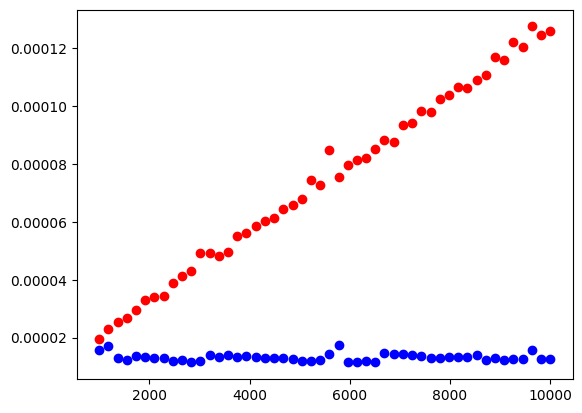

In [149]:
# plot average runtime of `append` for doubling vs. non-doubling strategies,
# as a function of the total number of elements appended

import timeit
import matplotlib.pyplot as plt

ns = np.linspace(1000, 10_000, 50, dtype=int)
ts1 = [timeit.timeit(stmt=f'for _ in range({n}):'
                          f'    lst.append(None, doubling=True)', 
                     setup='lst = ArrayList()',
                     globals=globals(), 
                     number=10) / n
       for n in ns]
ts2 = [timeit.timeit(stmt=f'for _ in range({n}): '
                          f'    lst.append(None, doubling=False)', 
                     setup='lst = ArrayList()',
                     globals=globals(), 
                     number=10) / n
       for n in ns]

plt.plot(ns, ts1, 'ob')
plt.plot(ns, ts2, 'or');

Note how doubling the array size (in blue) gives us a *constant amortized runtime*.

Not doubling the array size (in red) gives us a *linear amortized runtime*! (We won't prove this directly, but can easily observe it.)